# Capstone Project - The Battle of the Cities and Neighbourhoods

#### Applied Data Science Capstone by IBM/Coursera
******

### Table of contents

- Introduction: Problem Backgroud
- Data Description
- Methodology
- Analysis
- Results and Discussion
- Conclusion

## 1. Introduction: Problem Backgroud

Many young people do not live in the city or Neighbourhood where they are born and raised. They may incentive to move for better **economic development opportunity** or more **suitable lifestyle environment.**       

Let's assume a single young man who is currently live in a small rural town (in Canada) wants to move to a city (in Canada) in mid **2021.**    
>He doesn't speak French.     
>He has a bachelor's  degree in engineering.   
>He wants to live in that new city for at least **5 years** and likely to settle down.  
>He plans to rent a place to live for that 5 years.  

On the economic aspect, he may want to consider the demographic profile, employment opportunity, cost of living, etc. In general, He wants to find the cities meet his minimum expectation with the highest potential benefit.      
On the lifestyle aspect, he may want to choose a neighbourhood near a relatively dynamic business area for convenience but not too close to there so that he can also rest well at home.

## 2. Data Description

Statistics Canada is the data repository I chose for the macroscopic data in city comparison  because it is free to access and probably the most accurate as most of their data are based on the country Census program.    
The data tables (maybe) used in this analysis are:
> [Table: 17-10-0135-01 **Population estimates, by census metropolitan area and census agglomeration, 2016 boundaries**](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710013501)    
>  
> [Table: 36-10-0468-01 **Gross domestic product (GDP) at basic prices, by census metropolitan area**](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610046801&cubeTimeFrame.startYear=2009&cubeTimeFrame.endYear=2016&referencePeriods=20090101%2C20160101)    
>    
> [Table: 14-10-0097-01 **Employment by industry, three-month moving average, unadjusted for seasonality, census metropolitan areas**](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410009701)    


The common business venue data for the selected city will be obtained from Foursqures Places Database via [Foursqures Places API](https://developer.foursquare.com/docs/api-reference/venues/search/). It's possible to get the locations (coordinates), categories, and hours data of the city's venues for the neighbourhood comparison.

## 3. Methodology 

### 3.1 Top 5 Metropolitan Areas

I use the _Table: 17-10-0135-01_ to get the population estimate data.

In [1]:
# download the data tables zip packages and unzip them

!wget -O 17100135-eng.zip 'https://www150.statcan.gc.ca/n1/tbl/csv/17100135-eng.zip'
print('unziping ...')
!unzip -o -j 17100135-eng.zip 


--2020-09-12 23:28:35--  https://www150.statcan.gc.ca/n1/tbl/csv/17100135-eng.zip
Resolving www150.statcan.gc.ca (www150.statcan.gc.ca)... 205.193.226.160
Connecting to www150.statcan.gc.ca (www150.statcan.gc.ca)|205.193.226.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10384668 (9.9M) [application/zip]
Saving to: ‘17100135-eng.zip’

17100135-eng.zip    100%[===================>]   9.90M  1.72MB/s    in 5.8s    

2020-09-12 23:28:41 (1.70 MB/s) - ‘17100135-eng.zip’ saved [10384668/10384668]

unziping ...
Archive:  17100135-eng.zip
  inflating: 17100135.csv            
  inflating: 17100135_MetaData.csv   


In [2]:

import pandas as pd
    
pop_est = pd.read_csv('17100135.csv', dtype=object)

pop_est.head()


,REF_DATE,GEO,DGUID,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006,All census metropolitan areas and census agglo...,NaN,Both sexes,All ages,Persons,249,units,0,v1078828628,161.1.1,26666157,NaN,NaN,NaN,0
1,2006,All census metropolitan areas and census agglo...,NaN,Both sexes,0 to 4 years,Persons,249,units,0,v1078828606,161.1.2,1419011,NaN,NaN,NaN,0
2,2006,All census metropolitan areas and census agglo...,NaN,Both sexes,0 years,Persons,249,units,0,v1078828514,161.1.3,284235,NaN,NaN,NaN,0
3,2006,All census metropolitan areas and census agglo...,NaN,Both sexes,1 year,Persons,249,units,0,v1078828515,161.1.4,283841,NaN,NaN,NaN,0
4,2006,All census metropolitan areas and census agglo...,NaN,Both sexes,2 years,Persons,249,units,0,v1078828516,161.1.5,286322,NaN,NaN,NaN,0


In [3]:
# generate a list of unique values in 'GEO' column and turn it to DataFrame

pd.DataFrame([location for location in pop_est['GEO'].unique()]).shape


(177, 1)

So there are total of 177 places in the census dataset.

In [4]:
# first drop all the columns not interested

pop_est = pop_est.loc[:,pop_est.columns.isin(['REF_DATE','GEO','Sex','Age group','VALUE'])]

pop_est.head()


,REF_DATE,GEO,Sex,Age group,VALUE
0,2006,All census metropolitan areas and census agglo...,Both sexes,All ages,26666157
1,2006,All census metropolitan areas and census agglo...,Both sexes,0 to 4 years,1419011
2,2006,All census metropolitan areas and census agglo...,Both sexes,0 years,284235
3,2006,All census metropolitan areas and census agglo...,Both sexes,1 year,283841
4,2006,All census metropolitan areas and census agglo...,Both sexes,2 years,286322


In [5]:
# filter out a dataframe consists the total population estimation for each metropolitan area (except Quebec) in 2019

filt = (pop_est['Age group'] == 'All ages') & (pop_est['Sex'] == 'Both sexes') & (pop_est['REF_DATE'] == '2019') & (pop_est['GEO'].str.contains('Quebec') == False)
all_pop = pop_est.loc[filt]

all_pop.head()


,REF_DATE,GEO,Sex,Age group,VALUE
793845,2019,All census metropolitan areas and census agglo...,Both sexes,All ages,31484234
794190,2019,"All census metropolitan areas, Canada",Both sexes,All ages,26952447
794535,2019,"St. John's (CMA), Newfoundland and Labrador",Both sexes,All ages,212433
794880,2019,"Halifax (CMA), Nova Scotia",Both sexes,All ages,440348
795225,2019,"Moncton (CMA), New Brunswick",Both sexes,All ages,155825


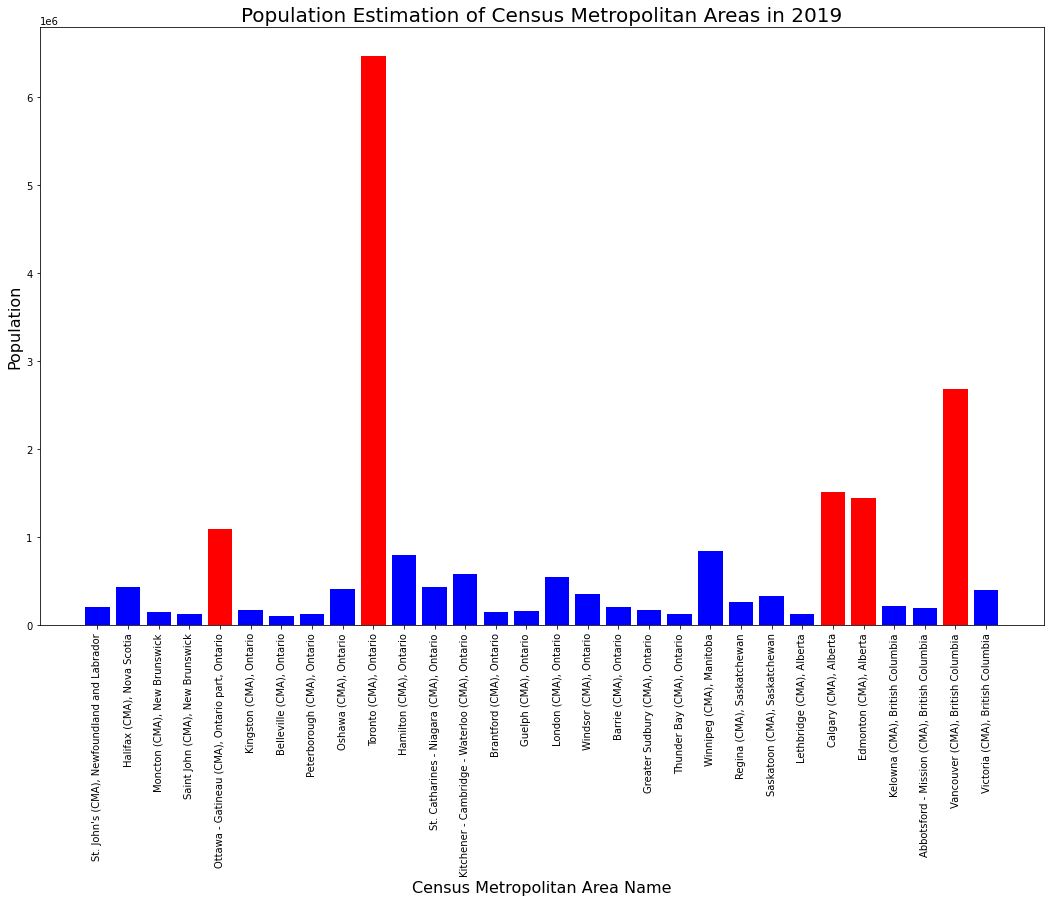

In [6]:
# use maplotlib bar chart to see the top five metropolitan areas


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

filt = (all_pop['GEO'].str.contains('CMA')) # if not filter the 'CMA', the chart will contain also agglomerations which are smaller
mca_pop = all_pop.loc[filt]

df_plot = mca_pop.set_index('GEO')[['VALUE']].astype(float)
fifth_large = df_plot['VALUE'].sort_values(ascending = False)[5]
colors = ['blue' if (x <= fifth_large) else 'red' for x in df_plot['VALUE']] # create the color coding pattern

plt.figure(figsize=(18, 11))

plt.bar(x = df_plot.index, height = df_plot['VALUE'], color=colors)
plt.xlabel('Census Metropolitan Area Name', fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel('Population', fontsize = 16)
plt.title('Population Estimation of Census Metropolitan Areas in 2019', fontsize = 20)

plt.show()


Since we will need to process a lot of data, I will only focus on Toronto, Vancouver, Calgary, Edmonton and Ottawa these five metropolitan areas for further analyses. Locations of these cities are shown below.

In [7]:
# use interactive map library folium to display the location of the cities
!pip install folium

import folium

can_loc = (55,-95)
mca_loc = {"Toronto":(43.7,-79.42),
           "Vancouver":(49.2734,-123.1216),
           "Ottawa":(45.4167,-75.7),
           "Calgary":(51.083,-114.08),
           "Edmonton":(53.55,-113.5)    
          }

map_can = folium.Map(location=can_loc, zoom_start=5)

for mca, loc in mca_loc.items(): 
    folium.Marker(loc, popup = mca).add_to(map_can)
    
map_can


### 3.2 Populaton Growth, Age and Gender Analyses

I keep using the _Table: 17-10-0135-01_  to find out the population change in the past 14 years in the Top 5 cities.

In [8]:
# get the list of 5 largest city names

#mca_pop.astype({'VALUE': 'int64'}).sort_values(by = ['VALUE'], ascending = False, inplace = True)
#[mac for mac in mca_pop['GEO'].head()]
##############################
Top_5 = [mac for mac in mca_pop.astype({'VALUE': 'int64'}).sort_values(by = ['VALUE'], ascending = False)['GEO'].head()]

Top_5


['Toronto (CMA), Ontario',
 'Vancouver (CMA), British Columbia',
 'Calgary (CMA), Alberta',
 'Edmonton (CMA), Alberta',
 'Ottawa - Gatineau (CMA), Ontario part, Ontario']

In [9]:
# filter out a dataframe consists the total population estimation for top_5 from 2006 to 2019

filt = (pop_est['Age group'] == 'All ages') & (pop_est['Sex'] == 'Both sexes') & (pop_est['GEO'].isin(Top_5))
yrs_pop = pop_est.loc[filt].reset_index(drop = True)

yrs_pop.head(10)

,REF_DATE,GEO,Sex,Age group,VALUE
0,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Both sexes,All ages,896678
1,2006,"Toronto (CMA), Ontario",Both sexes,All ages,5334382
2,2006,"Calgary (CMA), Alberta",Both sexes,All ages,1124723
3,2006,"Edmonton (CMA), Alberta",Both sexes,All ages,1074031
4,2006,"Vancouver (CMA), British Columbia",Both sexes,All ages,2188743
5,2007,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Both sexes,All ages,907573
6,2007,"Toronto (CMA), Ontario",Both sexes,All ages,5415765
7,2007,"Calgary (CMA), Alberta",Both sexes,All ages,1155560
8,2007,"Edmonton (CMA), Alberta",Both sexes,All ages,1104317
9,2007,"Vancouver (CMA), British Columbia",Both sexes,All ages,2216948


In [10]:
# plot a line graph of the population for each area over years

# set two index and unstacked them, the GEO(0) as new columns, years as new rows
df_plot = yrs_pop.set_index(['GEO','REF_DATE'])[['VALUE']].astype({'VALUE': 'int64'})
df_plot = df_plot.unstack(0)

df_plot

VALUE                          \
GEO      Calgary (CMA), Alberta Edmonton (CMA), Alberta   
REF_DATE                                                  
2006                    1124723                 1074031   
2007                    1155560                 1104317   
2008                    1187476                 1131781   
2009                    1220700                 1163333   
2010                    1240521                 1183929   
2011                    1263935                 1205342   
2012                    1300292                 1234307   
2013                    1344686                 1271773   
2014                    1386828                 1312214   
2015                    1414010                 1338092   
2016                    1438160                 1364394   
2017                    1459256                 1391219   
2018                    1483983                 1417062   
2019                    1514723                 1447143   

                                                         \
GEO      Ottawa - Gatineau (CMA), Ontario part, Ontario   
REF_DATE                                                  
2006                                             896678   
2007                                             907573   
2008                                             921850   
2009                                             936513   
2010                                             952773   
2011                                             966571   
2012                                             978709   
2013                                             988064   
2014                                             997494   
2015                                            1006491   
2016                                            1023678   
2017                                            1047592   
2018                                            1070338   
2019                                            1095134   

                                                                   
GEO      Toronto (CMA), Ontario Vancouver (CMA), British Columbia  
REF_DATE                                                           
2006                    5334382                           2188743  
2007                    5415765                           2216948  
2008                    5501325                           2253672  
2009                    5588312                           2301469  
2010                    5681126                           2344847  
2011                    5768001                           2374642  
2012                    5852841                           2418938  
2013                    5931697                           2459426  
2014                    5998737                           2507414  
2015                    6045240                           2544484  
2016                    6125013                           2582202  
2017                    6219114                           2612874  
2018                    6344275                           2652306  
2019                    6471850                           2691351

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


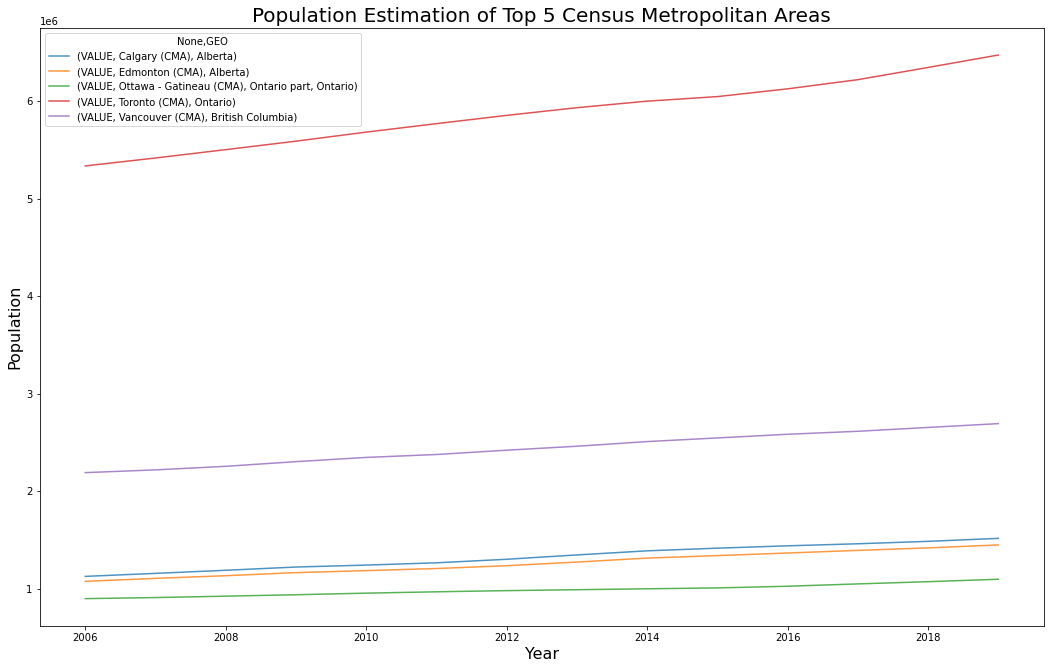

In [11]:
df_plot.plot(kind='line', alpha=0.8, figsize=(18, 11))

plt.xlabel('Year', fontsize = 16)
plt.ylabel('Population', fontsize = 16)
plt.title('Population Estimation of Top 5 Census Metropolitan Areas', fontsize = 20)

plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


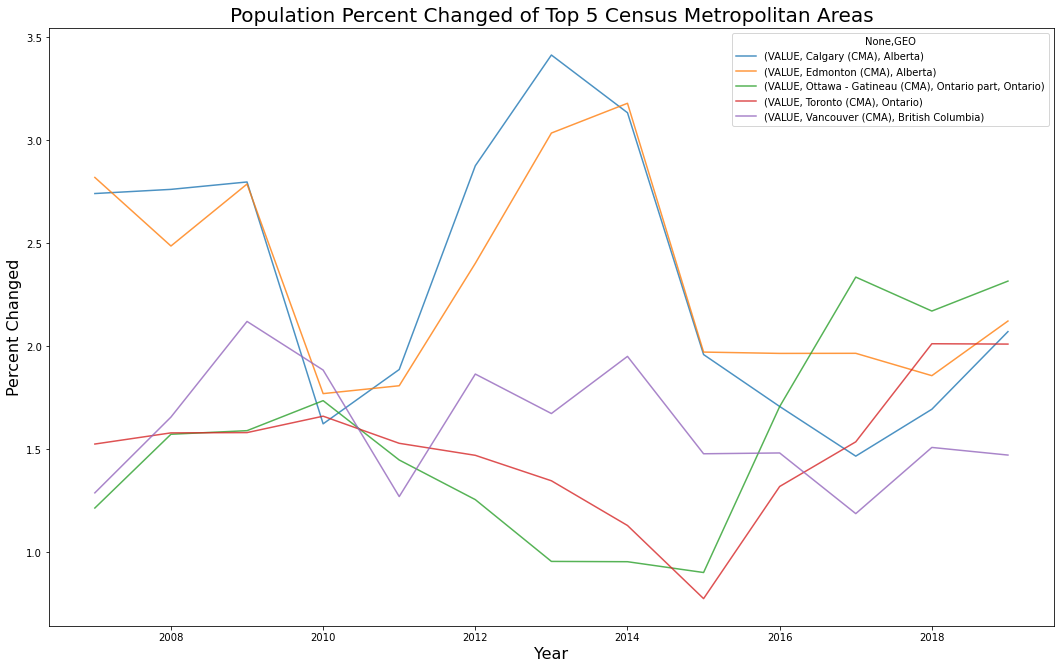

In [12]:
# make a line plot of percent change over years

df_plot.pct_change().apply(lambda x: x*100).plot(kind='line', alpha=0.8, figsize=(18, 11))

plt.xlabel('Year', fontsize = 16)
plt.ylabel('Percent Changed', fontsize = 16)
plt.title('Population Percent Changed of Top 5 Census Metropolitan Areas', fontsize = 20)

plt.show()

Make a smaller dataframe that contains GEO, Sex, Age and number of people info for the Top5s.

In [13]:

# filter out a dataframe consists the total population estimation for top_5 from 2006 to 2019

filt = ((pop_est['Age group'] == 'All ages') == False) & ((pop_est['Sex'] == 'Both sexes') == False) & (pop_est['GEO'].isin(Top_5)) & (pop_est['Age group'].str.contains('to|age|65 years') == False)
age_gen_pop = pop_est.loc[filt].reset_index(drop = True)
age_gen_pop.replace(to_replace = {'Age group':'(\s.*)'}, value = '', regex = True, inplace = True)
age_gen_pop = age_gen_pop.astype({'VALUE': 'int64', 'Age group': 'int64'})

age_gen_pop


,REF_DATE,GEO,Sex,Age group,VALUE
0,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Males,0,4732
1,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Males,1,4996
2,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Males,2,5088
3,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Males,3,4879
4,2006,"Ottawa - Gatineau (CMA), Ontario part, Ontario",Males,4,4816
...,...,...,...,...,...
12595,2019,"Vancouver (CMA), British Columbia",Females,86,4206
12596,2019,"Vancouver (CMA), British Columbia",Females,87,3925
12597,2019,"Vancouver (CMA), British Columbia",Females,88,3673
12598,2019,"Vancouver (CMA), British Columbia",Females,89,3180


Here I want to find out how is the city age composition. People were divided to three age groups: age in between 0-19 called youth; age in between 20-65 called work age because majority of people at this age range probably are working; age 66 and above called elder because most of them are retired.

In [14]:
# make a data frame for the age related plots

df_workpct = age_gen_pop.drop(columns=['Sex','Age group']).groupby(['GEO','REF_DATE']).sum()
df_workpct['work_VALUE'] = age_gen_pop.loc[age_gen_pop['Age group'].isin(range(20,66))].drop(columns=['Sex','Age group']).groupby(['GEO','REF_DATE']).sum()
df_workpct['work_pct'] = (df_workpct['work_VALUE']/df_workpct['VALUE'])*100
df_workpct['youth_VALUE'] = age_gen_pop.loc[age_gen_pop['Age group'].isin(range(0,20))].drop(columns=['Sex','Age group']).groupby(['GEO','REF_DATE']).sum()
df_workpct['youth_pct'] = (df_workpct['youth_VALUE']/df_workpct['VALUE'])*100
df_workpct['elder_VALUE'] = age_gen_pop.loc[age_gen_pop['Age group'].isin(range(66,91))].drop(columns=['Sex','Age group']).groupby(['GEO','REF_DATE']).sum()
df_workpct['elder_pct'] = (df_workpct['elder_VALUE']/df_workpct['VALUE'])*100


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Population Percentage')

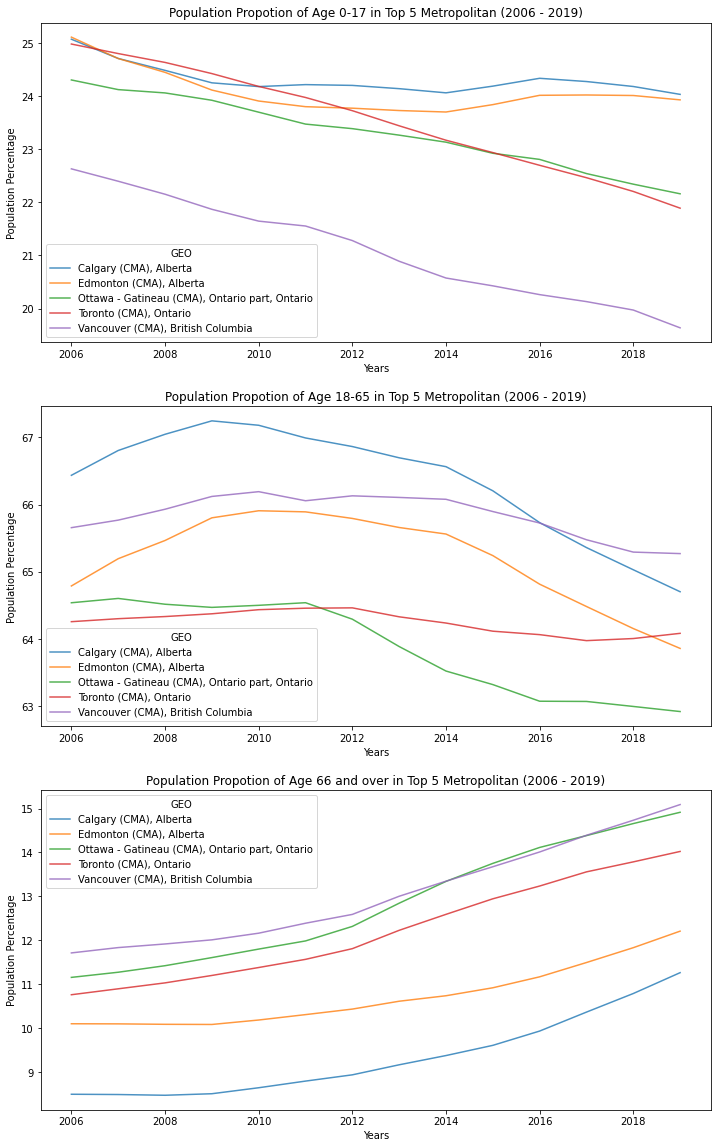

In [15]:
# ploting the age data frame

fig = plt.figure(figsize=(12, 20)) # create figure

ax0 = fig.add_subplot(3, 1, 1) # add subplot 1 (3 row, 1 columns, first plot)
ax1 = fig.add_subplot(3, 1, 2) # add subplot 2 (3 row, 1 columns, second plot)
ax2 = fig.add_subplot(3, 1, 3) # add subplot 3 (3 row, 1 columns, third plot)


# Subplot 1: 
df_workpct.unstack(0).xs('youth_pct', axis=1).plot(kind='line', alpha=0.8, ax=ax0) # add to subplot 1
ax0.set_title('Population Propotion of Age 0-17 in Top 5 Metropolitan (2006 - 2019)')
ax0.set_xlabel('Years')
ax0.set_ylabel('Population Percentage')

# Subplot 2:
df_workpct.unstack(0).xs('work_pct', axis=1).plot(kind='line', alpha=0.8, ax=ax1) # add to subplot 2
ax1.set_title('Population Propotion of Age 18-65 in Top 5 Metropolitan (2006 - 2019)')
ax1.set_xlabel('Years')
ax1.set_ylabel('Population Percentage')

# Subplot 3:
df_workpct.unstack(0).xs('elder_pct', axis=1).plot(kind='line', alpha=0.8, ax=ax2) # add to subplot 3
ax2.set_title('Population Propotion of Age 66 and over in Top 5 Metropolitan (2006 - 2019)')
ax2.set_xlabel('Years')
ax2.set_ylabel('Population Percentage')

Then, since the young man is still single, he probably interedted to have an idea of how competitive to find a partner if he lives in the city. We will analyse that from the 20s age population and sex ratio.

In [16]:
# define a function for plotting a pair of population bar chart and ratio line graph

def plot_gender(mca):
    young_adult_pop = age_gen_pop.loc[age_gen_pop['Age group'].isin(range(20,31))]
    group = young_adult_pop.groupby('GEO')
    df = group.get_group(mca).drop(columns=['GEO','Age group']).groupby(['REF_DATE','Sex']).sum()
    df = df.unstack(1).xs('VALUE', axis=1)
    df['M/F_ratio'] = df['Males']/df['Females']

    fig = plt.figure() # create figure

    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)

    # Subplot 1: bar plot
    df[['Males', 'Females']].plot(kind='bar', color=['lightblue','tomato'], alpha=0.8, figsize=(20, 6), ax=ax0) # add to subplot 1
    ax0.set_title('Female and Male population of 20s in '+ mca +' (2006 - 2019)')
    ax0.set_xlabel('Years')
    ax0.set_ylabel('Population')

    # Subplot 2: Line plot
    df[['M/F_ratio']].plot(kind='line', alpha=0.8, figsize=(20, 6), ax=ax1) # add to subplot 2
    ax1.set_title ('Human Sex Ratio of 20s in '+ mca +' (2006 - 2019)')
    ax1.set_xlabel('Years')
    ax1.set_ylabel('Ratio')

    plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


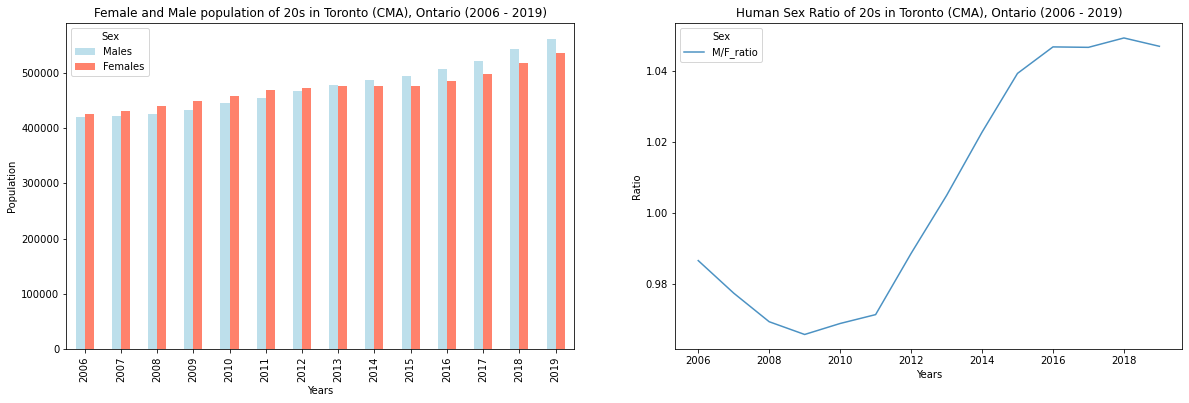

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


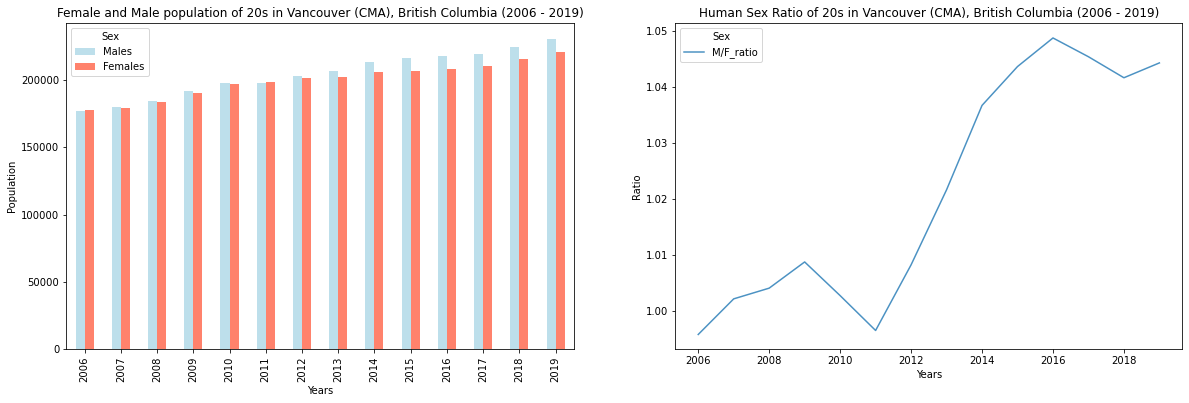

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


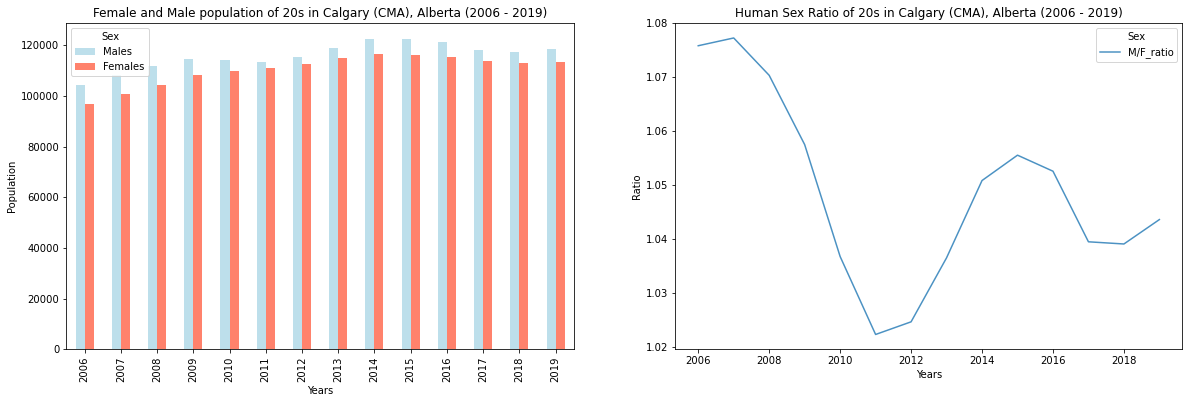

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


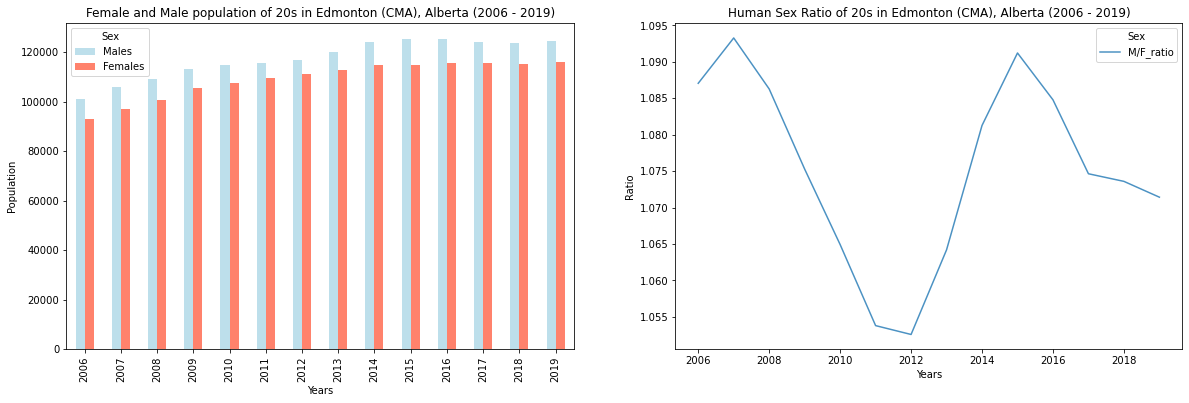

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


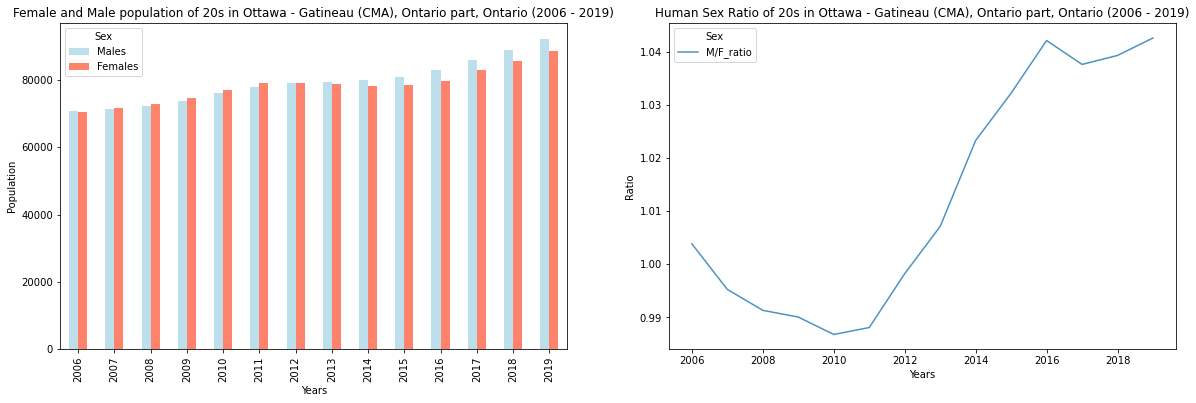

In [17]:
for area in Top_5:
    plot_gender(area)

### 3.3 GDP Analysis

Read the GDP data of the Top5s from Table: 36-10-0468-01.

In [18]:
# download the data tables zip packages and unzip them

!wget -O 36100468-eng.zip 'https://www150.statcan.gc.ca/n1/tbl/csv/36100468-eng.zip'
print('unziping ...')
!unzip -o -j 36100468-eng.zip 


--2020-09-12 23:29:29--  https://www150.statcan.gc.ca/n1/tbl/csv/36100468-eng.zip
Resolving www150.statcan.gc.ca (www150.statcan.gc.ca)... 205.193.226.160
Connecting to www150.statcan.gc.ca (www150.statcan.gc.ca)|205.193.226.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7306 (7.1K) [application/zip]
Saving to: ‘36100468-eng.zip’

36100468-eng.zip    100%[===================>]   7.13K  --.-KB/s    in 0.001s  

2020-09-12 23:29:29 (11.1 MB/s) - ‘36100468-eng.zip’ saved [7306/7306]

unziping ...
Archive:  36100468-eng.zip
  inflating: 36100468.csv            
  inflating: 36100468_MetaData.csv   


In [19]:
gdp_df = pd.read_csv('36100468.csv', dtype=object)

gdp_df.head()

# be sure to remember the unit of value is millions

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2009,Canada,2016A000011124,Dollars,81,millions,6,v110964806,1,1469118,NaN,NaN,NaN,0
1,2009,Newfoundland and Labrador,2016A000210,Dollars,81,millions,6,v110964807,2,23245,NaN,NaN,NaN,0
2,2009,"St. John's, Newfoundland and Labrador",2011S0503001,Dollars,81,millions,6,v110964808,3,9112,NaN,NaN,NaN,0
3,2009,"Non-census metropolitan areas, Newfoundland an...",NaN,Dollars,81,millions,6,v110964809,4,14133,NaN,NaN,NaN,0
4,2009,Prince Edward Island,2016A000211,Dollars,81,millions,6,v110964810,5,4480,NaN,NaN,NaN,0


In [20]:
# drop all the columns and rows not interested

gdp_df = gdp_df.loc[gdp_df['GEO'].str.contains('Toronto|Ottawa.*Ontario part|Vancouver|Edmonton|Calgary'),
                    gdp_df.columns.isin(['REF_DATE','GEO','VALUE'])].reset_index(drop = True) # drop columns and rows together

gdp_df.head(10)


,REF_DATE,GEO,VALUE
0,2009,"Ottawa – Gatineau, Ontario part, Ontario/Quebec",54638
1,2009,"Toronto, Ontario",282325
2,2009,"Calgary, Alberta",75386
3,2009,"Edmonton, Alberta",66893
4,2009,"Vancouver, British Columbia",102194
5,2010,"Ottawa – Gatineau, Ontario part, Ontario/Quebec",55739
6,2010,"Toronto, Ontario",296138
7,2010,"Calgary, Alberta",79717
8,2010,"Edmonton, Alberta",69841
9,2010,"Vancouver, British Columbia",105800


The cities have different population so we will look on the GDP per capita. 

In [21]:

filt = yrs_pop['REF_DATE'].astype('float64').isin(range(2009,2017))
numer = gdp_df['VALUE'].astype('float64')
denom = yrs_pop.loc[filt]['VALUE'].astype({'VALUE':'float64'}).reset_index(drop=True)

print(numer.shape, numer.dtypes)
print(denom.shape, denom.dtypes)

gdp_df['gdp_per_cap'] = (round(1000000*numer/denom,2))

gdp_df.head(10)

# notice now in gdp_per_cap column the unit is dollars

(40,) float64
(40,) float64


,REF_DATE,GEO,VALUE,gdp_per_cap
0,2009,"Ottawa – Gatineau, Ontario part, Ontario/Quebec",54638,58341.96
1,2009,"Toronto, Ontario",282325,50520.62
2,2009,"Calgary, Alberta",75386,61756.37
3,2009,"Edmonton, Alberta",66893,57501.16
4,2009,"Vancouver, British Columbia",102194,44403.81
5,2010,"Ottawa – Gatineau, Ontario part, Ontario/Quebec",55739,58501.87
6,2010,"Toronto, Ontario",296138,52126.64
7,2010,"Calgary, Alberta",79717,64260.90
8,2010,"Edmonton, Alberta",69841,58990.87
9,2010,"Vancouver, British Columbia",105800,45120.21


In [22]:
gdp_df = gdp_df.drop(columns='VALUE').set_index(['REF_DATE','GEO']).unstack(1)
gdp_df

gdp_per_cap                    \
GEO      Calgary, Alberta Edmonton, Alberta   
REF_DATE                                      
2009             61756.37          57501.16   
2010             64260.90          58990.87   
2011             68859.55          61245.69   
2012             72152.26          65525.03   
2013             73731.71          69305.61   
2014             77608.76          68516.26   
2015             74341.77          67419.88   
2016             70310.67          63646.57   

                                                                           \
GEO      Ottawa – Gatineau, Ontario part, Ontario/Quebec Toronto, Ontario   
REF_DATE                                                                    
2009                                            58341.96         50520.62   
2010                                            58501.87         52126.64   
2011                                            59506.23         53741.50   
2012                                            60280.43         55023.71   
2013                                            60910.02         56050.74   
2014                                            60290.09         58204.09   
2015                                            60595.67         60248.89   
2016                                            62877.19         63009.50   

                                      
GEO      Vancouver, British Columbia  
REF_DATE                              
2009                        44403.81  
2010                        45120.21  
2011                        46489.11  
2012                        47544.42  
2013                        48688.60  
2014                        50022.05  
2015                        51643.48  
2016                        53575.98

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'GDP per Capita Distribution of Top5s in 2009-2016')

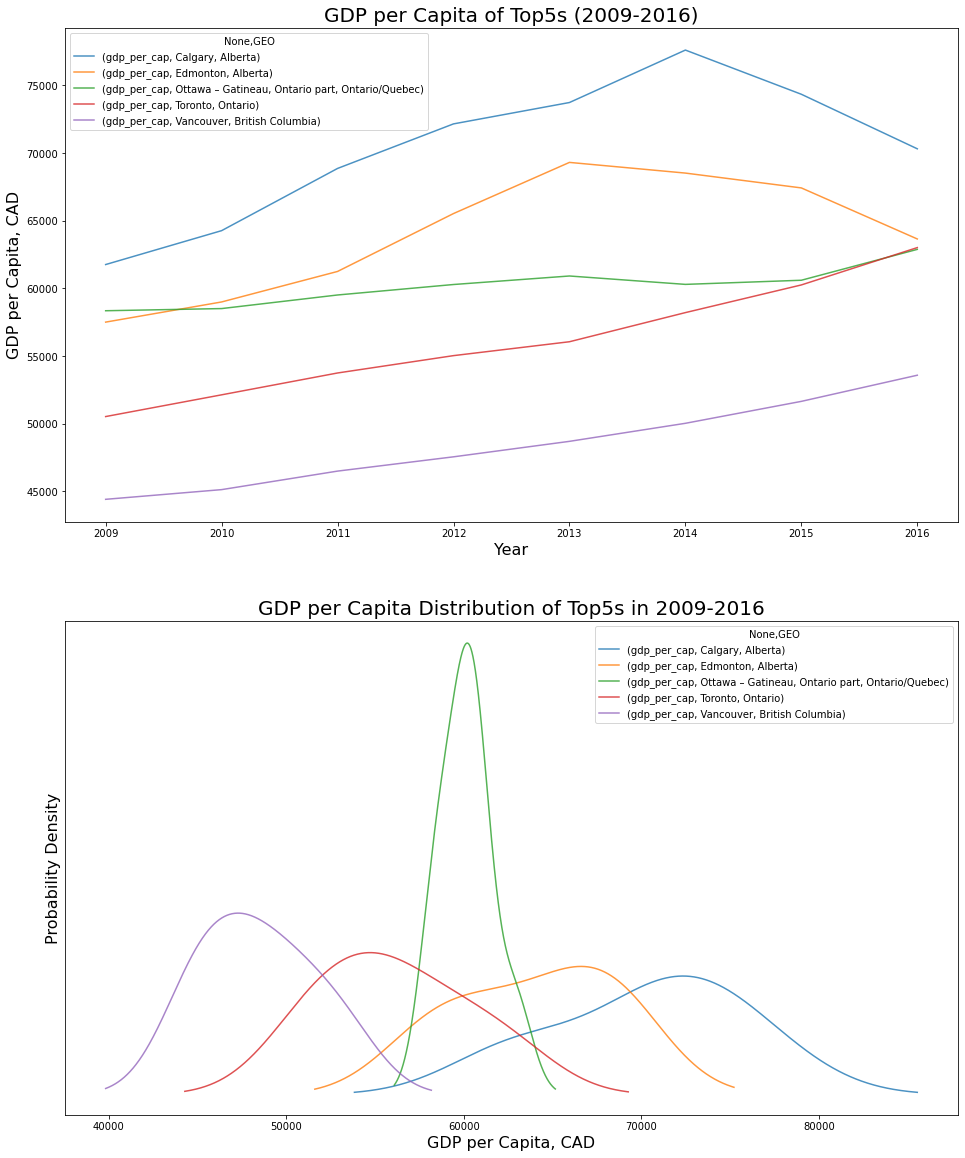

In [23]:
fig = plt.figure(figsize=(16, 20)) # create figure

ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)

# subplot 1: Trend
gdp_df.plot(kind='line', alpha=0.8, ax=ax0)
ax0.set_ylabel('GDP per Capita, CAD', fontsize = 16)
ax0.set_xlabel('Year', fontsize = 16)
ax0.set_title('GDP per Capita of Top5s (2009-2016)', fontsize = 20)

# subplot 2: Density
gdp_df.plot(kind='density', alpha=0.8,  ax=ax1)
ax1.set_ylabel('Probability Density', fontsize = 16)
ax1.yaxis.set_ticks([])
ax1.set_xlabel('GDP per Capita, CAD', fontsize = 16)
ax1.set_title('GDP per Capita Distribution of Top5s in 2009-2016', fontsize = 20)

### 3.4 Labour Market Analysis

Read the Labour force characteristics of the Top5s from Table: 14-10-0294-02.

In [24]:
# download the data tables zip packages and unzip them

!wget -O 14100294-eng.zip 'https://www150.statcan.gc.ca/n1/tbl/csv/14100294-eng.zip'
print('unziping ...')
!unzip -o -j 14100294-eng.zip 


--2020-09-12 23:29:34--  https://www150.statcan.gc.ca/n1/tbl/csv/14100294-eng.zip
Resolving www150.statcan.gc.ca (www150.statcan.gc.ca)... 205.193.226.160
Connecting to www150.statcan.gc.ca (www150.statcan.gc.ca)|205.193.226.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4037606 (3.8M) [application/zip]
Saving to: ‘14100294-eng.zip’

14100294-eng.zip    100%[===================>]   3.85M  1.88MB/s    in 2.0s    

2020-09-12 23:29:37 (1.88 MB/s) - ‘14100294-eng.zip’ saved [4037606/4037606]

unziping ...
Archive:  14100294-eng.zip
  inflating: 14100294.csv            
  inflating: 14100294_MetaData.csv   


In [25]:
lbr_df = pd.read_csv('14100294.csv', dtype=object)

lbr_df.head(30)

# be sure to remember the unit of Employment rate|Unemployment rate are Percentage

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-03,Canada,2016A000011124,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445764,1.1.1.1,24281.3,NaN,NaN,NaN,1
1,2001-03,Canada,2016A000011124,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91445765,1.1.1.2,24281.3,NaN,NaN,NaN,1
2,2001-03,Canada,2016A000011124,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445766,1.2.1.1,16010.7,NaN,NaN,NaN,1
3,2001-03,Canada,2016A000011124,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91445767,1.2.1.2,15758.5,NaN,NaN,NaN,1
4,2001-03,Canada,2016A000011124,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896490,1.2.2.1,33.0,NaN,NaN,NaN,1
5,2001-03,Canada,2016A000011124,Labour force,Standard error of month-to-month change,Seasonally adjusted,Persons,249,thousands,3,v101896491,1.2.3.1,NaN,..,NaN,NaN,1
6,2001-03,Canada,2016A000011124,Labour force,Standard error of year-over-year change,Seasonally adjusted,Persons,249,thousands,3,v101896492,1.2.4.1,NaN,..,NaN,NaN,1
7,2001-03,Canada,2016A000011124,Employment,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445768,1.3.1.1,14889.0,NaN,NaN,NaN,1
8,2001-03,Canada,2016A000011124,Employment,Estimate,Unadjusted,Persons,249,thousands,3,v91445769,1.3.1.2,14572.5,NaN,NaN,NaN,1
9,2001-03,Canada,2016A000011124,Employment,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896493,1.3.2.1,36.3,NaN,NaN,NaN,1


In [26]:
# drop all the columns and rows not interested

lbr_df = lbr_df.loc[lbr_df['GEO'].str.contains('Toronto|Ottawa.*Ontario part|Vancouver|Edmonton|Calgary') & 
                    lbr_df['Labour force characteristics'].str.contains('Employment rate|Unemployment rate') &
                    lbr_df['Statistics'].str.contains('Estimate') &
                    lbr_df['Data type'].str.contains('Seasonally adjusted'),
                    lbr_df.columns.isin(['REF_DATE','GEO','Labour force characteristics','VALUE'])].reset_index(drop = True) # drop columns and rows together

lbr_df.head(10)

,REF_DATE,GEO,Labour force characteristics,VALUE
0,2001-03,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Unemployment rate,4.6
1,2001-03,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Employment rate,68.1
2,2001-03,"Toronto, Ontario",Unemployment rate,6.0
3,2001-03,"Toronto, Ontario",Employment rate,64.6
4,2001-03,"Calgary, Alberta",Unemployment rate,4.9
5,2001-03,"Calgary, Alberta",Employment rate,71.1
6,2001-03,"Edmonton, Alberta",Unemployment rate,5.5
7,2001-03,"Edmonton, Alberta",Employment rate,67.6
8,2001-03,"Vancouver, British Columbia",Unemployment rate,5.8
9,2001-03,"Vancouver, British Columbia",Employment rate,62.2


In [27]:
lbr_df_em = lbr_df.astype({'VALUE':'float64'}).loc[lbr_df['Labour force characteristics'] == 'Employment rate'].drop(columns = 'Labour force characteristics')
lbr_df_uem = lbr_df.astype({'VALUE':'float64'}).loc[lbr_df['Labour force characteristics'] == 'Unemployment rate'].drop(columns = 'Labour force characteristics')

lbr_df_em = lbr_df_em.set_index(['REF_DATE','GEO']).unstack(1)
lbr_df_uem = lbr_df_uem.set_index(['REF_DATE','GEO']).unstack(1)

lbr_df_em.head(10)

VALUE                    \
GEO      Calgary, Alberta Edmonton, Alberta   
REF_DATE                                      
2001-03              71.1              67.6   
2001-04              71.1              67.7   
2001-05              71.5              67.7   
2001-06              72.3              68.0   
2001-07              72.7              67.9   
2001-08              72.8              67.7   
2001-09              72.9              66.5   
2001-10              72.8              66.2   
2001-11              72.8              65.8   
2001-12              72.8              65.8   

                                                                         \
GEO      Ottawa-Gatineau, Ontario part, Ontario/Quebec Toronto, Ontario   
REF_DATE                                                                  
2001-03                                           68.1             64.6   
2001-04                                           68.1             64.6   
2001-05                                           67.8             65.0   
2001-06                                           67.5             65.2   
2001-07                                           66.4             65.6   
2001-08                                           65.4             65.6   
2001-09                                           64.5             65.6   
2001-10                                           64.5             65.2   
2001-11                                           64.8             65.0   
2001-12                                           65.5             65.0   

                                      
GEO      Vancouver, British Columbia  
REF_DATE                              
2001-03                         62.2  
2001-04                         62.1  
2001-05                         62.3  
2001-06                         62.2  
2001-07                         62.2  
2001-08                         61.5  
2001-09                         61.0  
2001-10                         60.6  
2001-11                         60.3  
2001-12                         60.2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


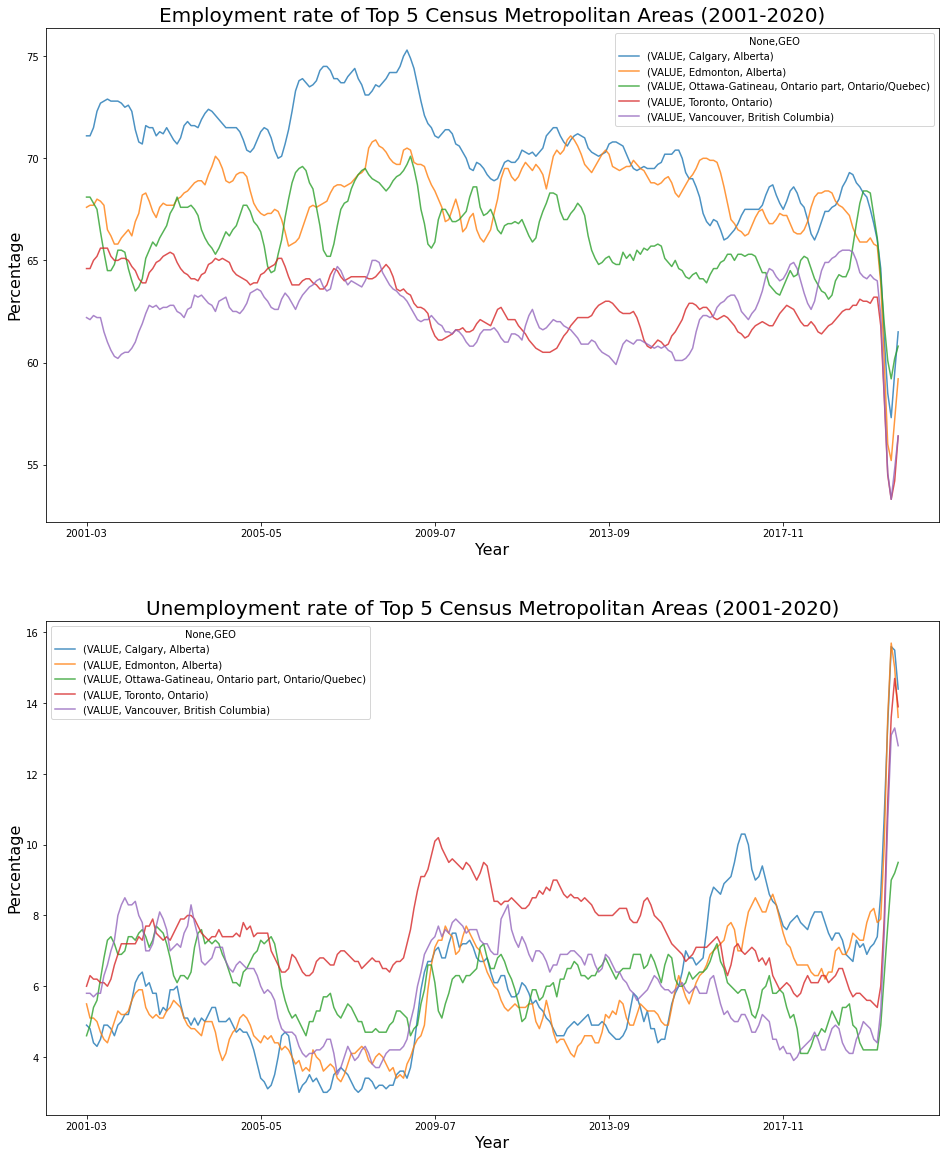

In [28]:
fig = plt.figure(figsize=(16, 20)) # create figure

ax0 = fig.add_subplot(2, 1, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(2, 1, 2) # add subplot 2 (1 row, 2 columns, second plot)

# subplot 1: Trend
lbr_df_em.plot(kind='line', alpha=0.8, ax=ax0)
ax0.set_ylabel('Percentage', fontsize = 16)
ax0.set_xlabel('Year', fontsize = 16)
ax0.set_title('Employment rate of Top 5 Census Metropolitan Areas (2001-2020)', fontsize = 20)

# subplot 2: Density
lbr_df_uem.plot(kind='line', alpha=0.8,  ax=ax1)
ax1.set_ylabel('Percentage', fontsize = 16)
ax1.set_xlabel('Year', fontsize = 16)
ax1.set_title('Unemployment rate of Top 5 Census Metropolitan Areas (2001-2020)', fontsize = 20)

plt.show()

## Results

From the two Population Estimation graphs, we see those cities' populations kept growing at a positive rate in the past 14 years. 
Calgary and Edmonton generally grew faster than other areas; however, Ottawa and Toronto's growth rate were steeply increasing in the last 4 years. If the areas are geographically close, then their population growth pattern is similar.

From the two Population age proportion graphs, we see all of the five areas having the population ageing problem, less and less young and working people but more and more old people.
Calgary and Edmonton are relatively 'young'. Vancouver is the 'oldest' area. Ottawa and Toronto are in between.

From the five population gender comparison graphs, we see all of the five areas having slightly imbalanced sex ratio for the people of age 20-30.
Calgary and Edmonton are a little more severe than Vancouver, Ottawa and Toronto.

From the two GDP graphs, we see all of the five areas are generally growing in 2009 to 2016. 
Calgary and Edmonton were once growing but shown some drop down around 2013-2014. In contrast, Vancouver, Ottawa and Toronto kept growing during this period. 
Ottawa's growth is the slowest, though its values are in the middle level. Calgary and Edmonton's GDP per capita were higher than Ottawa, while Toronto and Vancouver were less and equal to Ottawa.

From the two Employment rate and Unemployment rate graphs, wee see that over the past 20 years, the employment rate and unemployment rate for each city compare to other cities are relatively stable.
Vancouver and Toronto have the lowest employment rate and the highest unemployment rate. Calgary and Edmonton had the highest employment rate and lowest unemployment rate; however, after 2013, their advantage became not very apparent compare to others. Impressively, Ottawa's Employment rate and the Unemployment rate were among the middle of the five areas and shocked least for the COVID-19.

## Discussion 

Consider our assumption, the young man wants to move to a big city.
Based on the result, Ottawa seems to be a better choice despite its smallest population among the top5s. It has a fast growth rate, mild gender ratio and mid-level yet stable economy.
let's also assume he might want to go to University of Ottawa for studying a master's degree, so he wants to find a place to live near the university. ~~(to save my monthly free processing limit)~~
We will do a quick scan of that region by the Fousqure's API.

#### Define Foursquare Credentials and Version

In [29]:
CLIENT_ID = '******' # Foursquare ID
CLIENT_SECRET = '******' # Foursquare Secret
VERSION = '20200912' # Foursquare API version

#### Create a function to repeat the same process to all the near by neighborhoods (3km)

In [30]:
def getNearbyVenues(latitudes, longitudes, radius=3000):
    
    venues_list=[]
    LIMIT = 2000
    
        # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        latitudes, 
        longitudes, 
        radius, 
        LIMIT)
            
        # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
    venues_list.append([(  
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Venue', 
                  'Latitude', 
                  'Longitude', 
                  'Category']
    
    return(nearby_venues)

In [31]:
import json
import requests

University_coord = [45.423095, -75.683316]
latitudes=University_coord[0]
longitudes=University_coord[1]

University_venues = getNearbyVenues(latitudes, longitudes)

In [32]:
print(University_venues.shape)
University_venues.head()

# so There are just 100 venus retrived in the radius of 3000 meter

(100, 4)


,Venue,Latitude,Longitude,Category
0,freshii,45.423250,-75.687178,Salad Place
1,La Bottega,45.426894,-75.691906,Deli / Bodega
2,National Arts Centre - Centre National des Arts,45.422922,-75.692996,Concert Hall
3,Bytowne Cinema,45.429420,-75.684620,Indie Movie Theater
4,Confederation Park,45.422069,-75.692518,Park


In [51]:
University_map = folium.Map(location=[latitudes, longitudes], zoom_start=14)

In [52]:
for lat, lng, catag in zip(University_venues.Latitude, University_venues.Longitude, University_venues.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=catag,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(University_map)

# show map
University_map

## Conclusion 

In conclusion, according to multiple factors of the metropolitan areas. I found Ottawa is the best city for the client to choose. Inside Ottawa, he might be interested in starting looking for a place to rent near Sandy Hill.